In [1]:
#creating some data to test the normal equation to find the required parameters
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

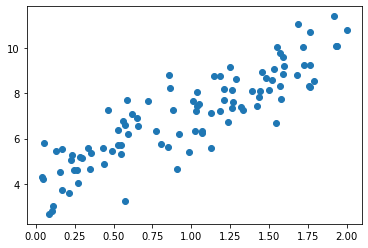

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.04563865],
       [10.15895964]])

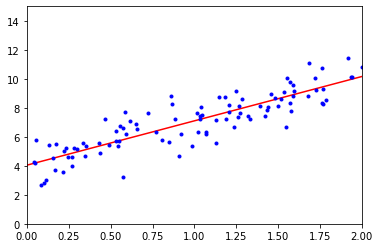

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
#performing this same linear regression using scikit learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

The above method is more efficient than directly computing the normal equation. In addition to that, if matrix has no inverse, normal equation doesnt work, but this linear regression method in sklearn works because it calculates the pseudo-inverse via the Moore-Penrose method